## Cuantos policias morirán en USA el 2022?


Conjunto de datos contiene información sobre muertes de policías desde 1791 hasta el presente. Este conjunto de datos también incluye la unidad de perros policía K9. Veremos cómo la vida de los policías está en peligro por varios delitos y enfermedades que ocurren en el país, e intentaremos predecir cuántos policías podrían morir en 2022.

- Rank (String): Rango alcanzado antes de morir
- Name (String): Nombre
- CauseofDeath (String): Causa de muerte
- Date (String): Fecha de muerte
- Month (String): Mes de la muerte
- Day (String): Dia de la muerte
- Department (String): Nombre del departamento al cual pertenecía el policía
- State (String): Estado donde se encuentra el departamento
- K9_Unit (Boolean): apodo del perro policia y la unidad canina


Fuente: https://www.odmp.org/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
sns.set_theme()
import os
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
 
dataset = 'mayureshkoli/police-deaths-in-usa-from-1791-to-2022'
path = 'dataset/mayureshkoli'

api = KaggleApi()
api.authenticate()

api.dataset_download_file(dataset, 'police_deaths_in_america.csv', path)

os.chdir('C:\\Users\\rodrigo\\Documents\\Python_Scripts\\dataset\\mayureshkoli')

import zipfile
with zipfile.ZipFile('police_deaths_in_america.csv.zip','r') as zipref:
    zipref.extractall()

In [15]:
# Descripcion de la data
df = pd.read_csv("police_deaths_in_america.csv")

### Descriptiva

In [10]:
df.shape

(26269, 10)

In [16]:
df

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State,K9_Unit
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York,0
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York,0
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York,0
3,Marshal,Robert Forsyth,Gunfire,"Saturday, January 11, 1794",1794,January,Saturday,United States Department of Justice - United S...,United States,0
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York,0
...,...,...,...,...,...,...,...,...,...,...
26264,K9,Ciro,Fire,"Thursday, March 3, 2022",2022,March,Thursday,"Humphreys County Sheriff's Office, TN",Tennessee,1
26265,K9,Dash,Gunfire,"Wednesday, March 9, 2022",2022,March,Wednesday,"Shepherdsville Police Department, KY",Kentucky,1
26266,K9,Major,Gunfire,"Sunday, April 10, 2022",2022,April,Sunday,"Franklin County Sheriff's Office, NC",North Carolina,1
26267,K9,Jinx,Gunfire,"Monday, April 11, 2022",2022,April,Monday,"El Paso County Sheriff's Office, CO",Colorado,1


In [17]:
# Eliminamos las unidades caninas
df = df[df["K9_Unit"]==0].reset_index(drop=True)
df.drop("K9_Unit",axis=1,inplace=True)

# ahora obtenemos solo a los policias caidos en accion
df

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York
3,Marshal,Robert Forsyth,Gunfire,"Saturday, January 11, 1794",1794,January,Saturday,United States Department of Justice - United S...,United States
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York
...,...,...,...,...,...,...,...,...,...
25781,Supervisory Police Officer,"Yiu Tak ""Louis"" Tao",9/11 related illness,"Tuesday, May 17, 2022",2022,May,Tuesday,United States Department of Justice - Federal ...,United States
25782,Senior Correctional Police Officer,Daniel Sincavage,Automobile crash,"Thursday, May 19, 2022",2022,May,Thursday,"New Jersey Department of Corrections, NJ",New Jersey
25783,Officer Trainee,Cody Alan Olafson,Duty related illness,"Friday, May 20, 2022",2022,May,Friday,United States Department of Homeland Security ...,United States
25784,Police Officer,Houston Tipping,Training accident,"Sunday, May 29, 2022",2022,May,Sunday,"Los Angeles Police Department, CA",California


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25786 entries, 0 to 25785
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            25786 non-null  object
 1   Name            25786 non-null  object
 2   Cause_of_Death  25786 non-null  object
 3   Date            25786 non-null  object
 4   Year            25786 non-null  int64 
 5   Month           25786 non-null  object
 6   Day             25786 non-null  object
 7   Department      25786 non-null  object
 8   State           25786 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.8+ MB


Han muertos 25.786 policias desde 1971

**Cuantos policias han muerto por año?**

In [28]:
l=['Name','Cause_of_Death','Date','Month','Day','Department','State']
muertos_año = df.groupby('Year').count().drop(l,axis=1)
muertos_año = muertos_año.rename(columns={'Rank':'Total'})
muertos_año

,Total
Year,
1791,2
1792,1
1794,1
1797,2
1798,1
...,...
2018,188
2019,158
2020,414


**En promedio, cuantos policias mueren por año?**

In [29]:
muertos_año.describe()

,Total
count,210.000000
mean,122.790476
std,101.088733
min,1.000000
25%,20.250000
50%,129.500000
75%,185.000000
max,622.000000


Aproximadamente mueren 123 policias por año.

**Cuales son los 5 años mas letales para los policias?**

In [32]:
muertos_año.sort_values('Total',ascending=False).head(5)

,Total
Year,
2021,622
2020,414
1930,347
1927,335
1932,327


 Increiblemente los ultimos años han sido muy letales para los policias de USA.

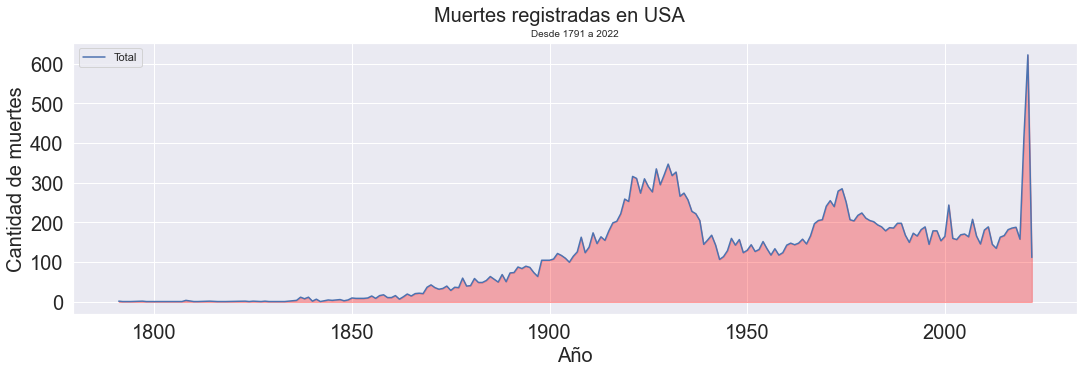

In [39]:
# Gráfico
plt.figure(figsize=(18,5))
plot_1 = sns.lineplot(data=muertos_año)

plt.suptitle("Muertes registradas en USA",fontsize=20)
plt.title("Desde 1791 a 2022",fontsize=10)

plt.xlabel("Año",fontsize=20)
plt.ylabel("Cantidad de muertes",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.fill_between(muertos_año.index,muertos_año["Total"], color='red', alpha=.3)
plt.show()

 **Que sucede en los ultimos 2 años?, Porque han muertos tantos policias?**

In [68]:
# Selección de los ultimos dos años (2021 y 2020)
muertes_20_21 = (df[(df.Year > 2019) & (df.Year < 2022)])
muertes_20_21

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State
24638,Investigator,Ryan D. Fortini,9/11 related illness,"Wednesday, January 1, 2020",2020,January,Wednesday,"New York State Police, NY",New York
24639,Police Officer,"Michael Lee Henry, Jr.",Motorcycle crash,"Thursday, January 2, 2020",2020,January,Thursday,"Derry Township Police Department, PA",Pennsylvania
24640,Public Safety Officer,Jackson Ryan Winkeler,Gunfire,"Sunday, January 5, 2020",2020,January,Sunday,Florence Regional Airport Department of Public...,South Carolina
24641,Police Officer,Paul Patrick Dunn,Motorcycle crash,"Thursday, January 9, 2020",2020,January,Thursday,"Lakeland Police Department, FL",Florida
24642,Police Officer,Nicholas Lee Reyna,Struck by vehicle,"Saturday, January 11, 2020",2020,January,Saturday,"Lubbock Police Department, TX",Texas
...,...,...,...,...,...,...,...,...,...
25669,Detention Officer,Gary Lynn Bean,COVID19,"Thursday, December 30, 2021",2021,December,Thursday,"Conway County Sheriff's Office, AR",Arkansas
25670,Sergeant,Marlene Roberta Rittmanic,Gunfire,"Thursday, December 30, 2021",2021,December,Thursday,"Bradley Police Department, IL",Illinois
25671,Officer,Brian Vogel,COVID19,"Thursday, December 30, 2021",2021,December,Thursday,United States Department of Homeland Security ...,United States
25672,Sergeant,Thomas Edward Stanley,COVID19,"Friday, December 31, 2021",2021,December,Friday,"Atascadero State Hospital Police Department, CA",California


**Causas de muertes de los años 2020 y 2021**

In [49]:
l = ['Name','Date','Year','Month','Day','Department','State']

causas_muertes_20_21 = muertes_20_21.groupby(by="Cause_of_Death").count().drop(l,axis=1)
causas_muertes_20_21 = causas_muertes_20_21.rename(columns={'Rank':'Total'})

causas_muertes_20_21

,Total
Cause_of_Death,
9/11 related illness,35
Aircraft accident,1
Assault,7
Automobile crash,43
COVID19,716
Drowned,7
Duty related illness,9
Exposure to toxins,1
Fall,1


**La causa del incremento de las muertes de los policias en USA fue por el COVID**

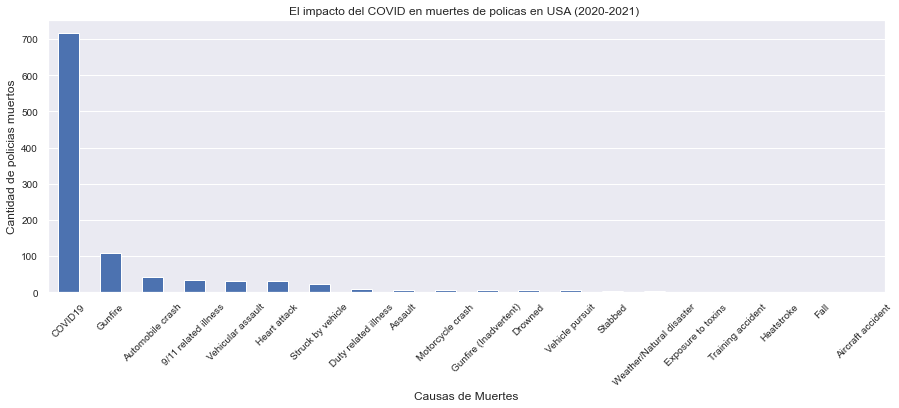

In [93]:
p=muertes_20_21['Cause_of_Death'].value_counts().plot(kind="bar", fontsize = 10, figsize=(15,5))
plt.xticks(rotation = 45)
plt.grid(axis='x')
plt.xlabel('Causas de Muertes')
plt.ylabel('Cantidad de policias muertos')
plt.title('El impacto del COVID en muertes de policas en USA (2020-2021) ');

**Observación de las causas de muerte desde 1791**

In [108]:
# Observar la cantidad y frecuencia relativa de muerte de policias de acuerdo a las causas de muerte.
total_cause_of_death = df.groupby("Cause_of_Death").count().drop(l,axis=1)
total_cause_of_death = total_cause_of_death.rename(columns={'Rank':'Total'})
total_cause_of_death = total_cause_of_death.sort_values("Total",ascending=False)
total_cause_of_death['Frecuencia_Relativa'] = (total_cause_of_death['Total'] / total_cause_of_death['Total'].sum()) * 100
total_cause_of_death

,Total,Frecuencia_Relativa
Cause_of_Death,,
Gunfire,12965,50.279221
Automobile crash,2540,9.850306
Heart attack,1212,4.700225
Motorcycle crash,1167,4.525712
Vehicular assault,987,3.827658
Struck by vehicle,928,3.598852
COVID19,771,2.989995
Assault,701,2.718529
Vehicle pursuit,691,2.679749


**12.965** policias han muerto en USA a causa de las armas de fuego, representando el **50,27%** del total de las causas de muertes.

¿Cuáles son las 10 principales causas de muerte con la mayor cantidad de muertes policiales?

In [109]:
total_cause_of_death.head(10)

,Total,Frecuencia_Relativa
Cause_of_Death,,
Gunfire,12965,50.279221
Automobile crash,2540,9.850306
Heart attack,1212,4.700225
Motorcycle crash,1167,4.525712
Vehicular assault,987,3.827658
Struck by vehicle,928,3.598852
COVID19,771,2.989995
Assault,701,2.718529
Vehicle pursuit,691,2.679749


**En que mes mueren más policias en USA?**

In [116]:
l = ['Name','Cause_of_Death','Date','Year','Day','Department','State']
muertes_mes = df.groupby(by="Month").count().drop(l,axis=1)
muertes_mes = muertes_mes.rename(columns={'Rank':'Total'})
muertes_mes = muertes_mes.reindex(["January","February","March","April","May",
            "June","July","August","September","October","November","December"])
muertes_mes['Frecuencia_Relativa'] = (muertes_mes['Total'] / muertes_mes['Total'].sum()) * 100
muertes_mes

,Total,Frecuencia_Relativa
Month,,
January,2121,8.225394
February,1875,7.271388
March,1904,7.383852
April,2042,7.919026
May,2090,8.105173
June,2010,7.794927
July,2350,9.113472
August,2360,9.152253
September,2397,9.295742


In [118]:
# ordenadas
muertes_mes_ordenadas = muertes_mes.sort_values(by="Total",ascending=False)
muertes_mes_ordenadas

# Septiembre es el mes donde han muerto mas policias

,Total,Frecuencia_Relativa
Month,,
September,2397,9.295742
December,2365,9.171644
August,2360,9.152253
July,2350,9.113472
October,2170,8.415419
January,2121,8.225394
November,2102,8.151710
May,2090,8.105173
April,2042,7.919026


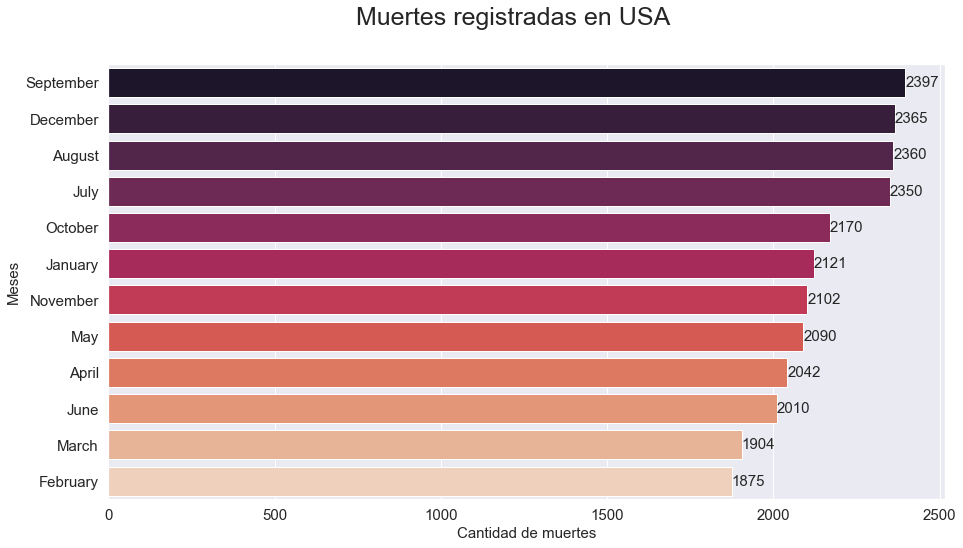

In [123]:
plt.figure(figsize=(15,8))
plot_2 = sns.barplot(data=muertes_mes_ordenadas,x=muertes_mes_ordenadas['Total'],
                     y=muertes_mes_ordenadas.index,palette="rocket")
plt.suptitle("Muertes registradas en USA",fontsize=25)
plt.title("",fontsize=20)
plt.xlabel("Cantidad de muertes",fontsize=15)
plt.ylabel("Meses",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plot_2.bar_label(plot_2.containers[0],fontsize=15)
plt.show()

**Ahora sabemos que la segunda mitad del año es la más letal para los policias, pero en que dia se producen más muertes policiacas?**

In [126]:
l = ['Name','Cause_of_Death','Date','Year','Month','Department','State']
muerte_dia = df.groupby(by="Day").count().drop(l,axis=1)
muerte_dia = muerte_dia.rename(columns={'Rank':'Total'})
muerte_dia = muerte_dia.reindex(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
muerte_dia['Frecuencia_Relativa'] = (muerte_dia['Total'] / muerte_dia['Total'].sum()) * 100
muerte_dia.sort_values(by="Total",ascending=False)

,Total,Frecuencia_Relativa
Day,,
Saturday,4019,15.585977
Friday,3779,14.655239
Sunday,3778,14.651361
Thursday,3645,14.135577
Tuesday,3537,13.716746
Monday,3536,13.712867
Wednesday,3492,13.542232


El fin de semana (Viernes, Sábado y Domingo), se produce el **44.88%** de todas las muertes de los policías en USA.-

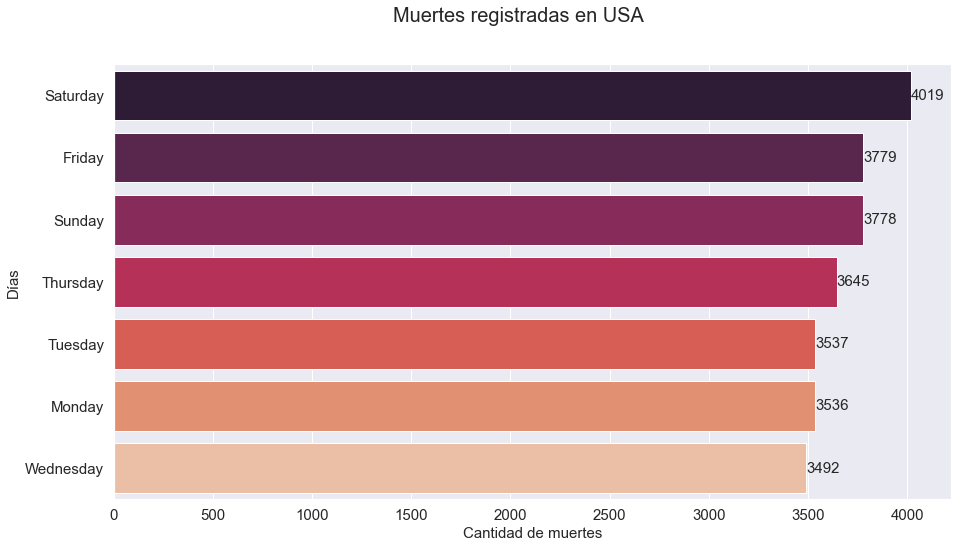

In [132]:
df_muerte = muerte_dia.sort_values(by="Total",ascending=False)
plt.figure(figsize=(15,8))
plot_3 = sns.barplot(data=df_muerte,x=df_muerte['Total'],
                     y=df_muerte.index,palette="rocket")
plt.suptitle("Muertes registradas en USA",fontsize=20)
plt.title("",fontsize=15)
plt.xlabel("Cantidad de muertes",fontsize=15)
plt.ylabel("Días",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plot_3.bar_label(plot_3.containers[0],fontsize=15)
plt.show()

**Que rangos de policías mueren más en USA?**

In [138]:
l = ['Cause_of_Death','Date','Year','Month','Department','State','Day']
rango_muerte = df.groupby(by="Rank").count().drop(l,axis=1)
rango_muerte = rango_muerte.rename(columns={'Name':'Total'})
rango_muerte = rango_muerte.sort_values(by="Total",ascending=False)
rango_muerte['Frecuencia_Relativa'] = (rango_muerte['Total'] / rango_muerte['Total'].sum()) * 100
rango_muerte.head(5)

,Total,Frecuencia_Relativa
Rank,,
Patrolman,3876,15.031412
Police Officer,3549,13.763282
Deputy Sheriff,3224,12.502909
Officer,1746,6.771116
Sergeant,1423,5.518498


Los rangos más letales son el patrullero, oficial de policía y el ayudante del Sheriff, obteniendo un **41.29%** del total de muertes.

**En que departamento se producen más muertes de policias?**

In [139]:
l = ['Cause_of_Death','Date','Year','Month','Name','State','Day']

depart_muerte = df.groupby(by="Department").count().drop(l,axis=1)
depart_muerte = depart_muerte.rename(columns={'Rank':'Total'})
depart_muerte = depart_muerte.sort_values(by="Total",ascending=False)

depart_muerte.head(10)

,Total
Department,
"New York City Police Department, NY",963
"Chicago Police Department, IL",515
"Puerto Rico Police Department, PR",358
"Philadelphia Police Department, PA",318
"United States Department of Justice - United States Marshals Service, US",306
"Detroit Police Department, MI",243
"California Highway Patrol, CA",231
"Los Angeles Police Department, CA",220
"St. Louis Metropolitan Police Department, MO",170


En el Departamento de Policía de Nueva York se han producido las mayores bajas.

## Inferencia

### De acuerdo a los datos, cuantos policías fallecerán para el año 2022?

Se procede a sustraer una muestra de los ultimos 21 años para predecir las muertes del año 2022.

In [168]:
# Generando un marco de contencion

# Conteo de vidas 
humans_df = df

# agrupamos por año y contamos las muertes
l = ['Name','Cause_of_Death','Date','Month','Day','Department','State']
count_df = humans_df.groupby(by="Year").count().drop(l,axis=1)
count_df = count_df.rename(columns={'Rank':'Cantidad'})

# Traspasamos todo el conteo al df
all_unit_count = count_df.tail(23)
all_unit_count = all_unit_count.drop(index=2022,axis=0)
all_unit_count.describe()

,Cantidad
count,22.000000
mean,203.636364
std,109.120093
min,135.000000
25%,160.750000
50%,168.000000
75%,187.500000
max,622.000000


In [169]:
# Utilizando t-student se procede a calcular una estimación de muertes de policias para el año 2022, utilizando los datos desde el 2000 hasta el 2021.-
stats.t.interval (alpha = 0.95, df = len (all_unit_count) -1, loc = np.mean (all_unit_count), scale = stats.sem (all_unit_count))

(array([155.25522457]), array([252.01750271]))

Con esta prueba, podemos estimar que para el año 2022 al **95%** de nivel de confianza, las muertes de policías serán aproximadamente, entre 156 y 253.